In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# CustomerID needs to be removed, since it does not serve any purpose in the data
# Gender and Age, we are removing this, to simplify the understanding of the concepts

In [ ]:
X=df.iloc[:,[3,4]].values

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Elbow method, to decide the appropriate number of clusters
# The maximum no. of possible clusters is taken as sq.root of total number of data points

In [ ]:
np.sqrt(len(df['Age']))

14.142135623730951

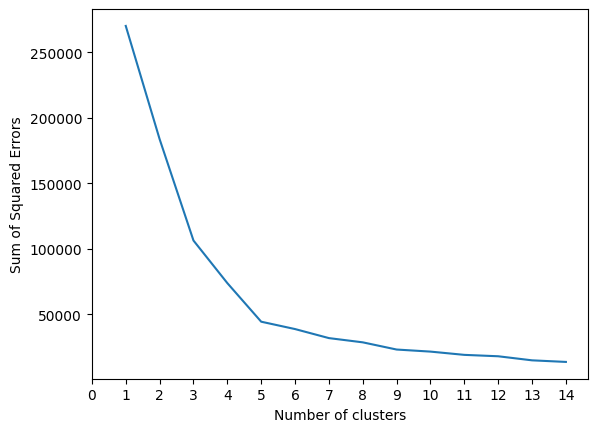

In [ ]:
k=range(1,15)

SSE=[]
for i in k:
  model_clusters=KMeans(n_clusters=i,random_state=14,n_init='auto')
  model_clusters.fit(X)
  SSE.append(model_clusters.inertia_)

plt.plot(k,SSE)
plt.xticks(np.arange(0,15,1))
plt.xlabel("Number of clusters")
plt.ylabel("Sum of Squared Errors")
plt.show()

In [ ]:
# The elbow is very predominant at k=5.
# Hence, we will decide 5 to be the most appropriate number of clusters for this data

In [ ]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=5,random_state=14,n_init='auto')

In [ ]:
model.fit(X)

KMeans(n_clusters=5, n_init='auto', random_state=14)

In [ ]:
y=model.predict(X)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
df['Cluster_number']=model.predict(X)

In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_number
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


In [ ]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int32), array([81, 39, 22, 35, 23]))

In [ ]:
np.sum([81, 39, 22, 35, 23])

200

In [ ]:
X[y==2]  #All the data points belonging to cluster number 2

array([[15, 81],
       [16, 77],
       [17, 76],
       [18, 94],
       [19, 72],
       [19, 99],
       [20, 77],
       [20, 79],
       [21, 66],
       [23, 98],
       [24, 73],
       [25, 73],
       [28, 82],
       [28, 61],
       [29, 87],
       [30, 73],
       [33, 92],
       [33, 81],
       [34, 73],
       [37, 75],
       [38, 92],
       [39, 65]])

In [ ]:
X[y==2,0] #Annual Income for data points in Cluster 2

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39])

In [ ]:
X[y==2,1] #Spending Score for data points in Cluster 2

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 65])

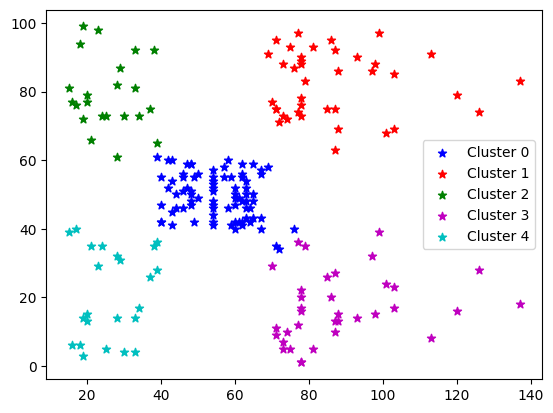

In [ ]:
plt.scatter(X[y==0,0],X[y==0,1],label="Cluster 0",color="b",marker="*")
plt.scatter(X[y==1,0],X[y==1,1],label="Cluster 1",color="r",marker="*")
plt.scatter(X[y==2,0],X[y==2,1],label="Cluster 2",color="g",marker="*")
plt.scatter(X[y==3,0],X[y==3,1],label="Cluster 3",color="m",marker="*")
plt.scatter(X[y==4,0],X[y==4,1],label="Cluster 4",color="c",marker="*")
plt.legend()

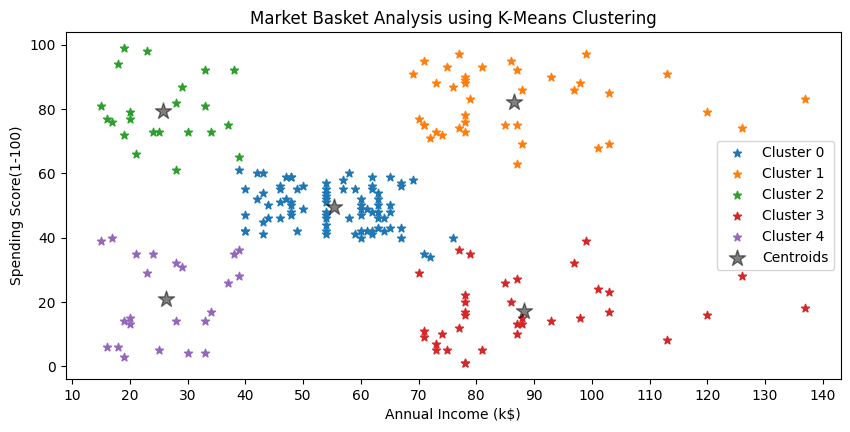

In [ ]:
plt.figure(figsize=(10,4.5))
for i in range(0,5):
  plt.scatter(X[y==i,0],X[y==i,1],label=f"Cluster {i}",marker="*")
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color="k",marker="*",s=150,label="Centroids",alpha=0.5)
plt.legend()
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score(1-100)")
plt.title("Market Basket Analysis using K-Means Clustering")
plt.xticks(np.arange(10,150,10))
plt.show()

In [ ]:
# Analysis
# Cluster 0: These constitute majority of our customers. Standard marketing policy
# Cluster 1: Gold Customers. Separate queues, dedicated support people to assist them
# Cluster 2: Bonus Customers.
# Cluster 3: Big oppurtunity. Better Customer Service, recommedation of higher quality products
# Cluster 4: Discounts

In [ ]:
# silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silhouette_score(X,y)

0.553931997444648

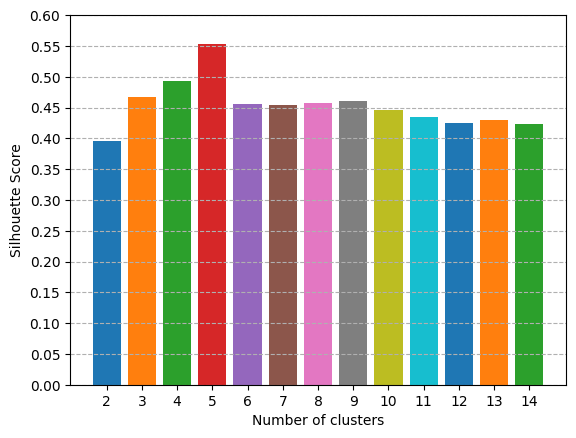

In [ ]:
k=range(2,15)
for i in k:
  model_score=KMeans(n_clusters=i,random_state=14,n_init='auto')
  model_score.fit(X)
  y=model_score.predict(X)
  plt.bar(i,silhouette_score(X,y))
plt.xticks(np.arange(2,15,1))
plt.yticks(np.arange(0.0,0.61,0.05))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette Score")
plt.grid(linestyle="--",axis='y')
plt.show()